<a href="https://colab.research.google.com/github/LeonardoGastaldo/labo2025v/blob/main/src/workflows/EntregaFinal/Test%20de%20Wilcoxon%205%20envios%20Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comenzando... Limpiando la memoria

In [14]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1496745,80.0,2435135,130.1,2435135,130.1
Vcells,2726129,20.8,8388608,64.0,5770275,44.1


### Vectores con Ganancias promedio
Se genera un vector por cada una de las Ganancias obtenidas para los 5 experimentos realizados con diferentes semillas y cada uno de los cortes de envío a Kaggle para el codigo WorkFlow Baseline.

*Es solo para saber si hay algún envío mejores que los otros.*

In [15]:
# Definición de los Vectores de Datos (Re-definición para asegurar la lista)
# Vectores sin punto (en formato entero)
X800 <- c(3634, 3694, 3287, 4002, 3674)
X850 <- c(3843, 3932, 3505, 3813, 3863)
X900 <- c(3654, 4131, 3316, 4021, 3723)
X950 <- c(3912, 5144, 3584, 3902, 3525)
X1000 <- c(3723, 5005, 3435, 3743, 3376)
X1050 <- c(3594, 4836, 3654, 3654, 3565)
X1100 <- c(3485, 4697, 3932, 3902, 3843)
X1150 <- c(3296, 4518, 4180, 3723, 3723)
X1200 <- c(3148, 4399, 4041, 3992, 3555)
X1250 <- c(3386, 4230, 3912, 3853, 3426)
X1300 <- c(3267, 4141, 4180, 3714, 3237)

# Lista principal con todos los parámetros
todos_los_parametros <- list(
  PARAM_X800 = X800,
  PARAM_X850 = X850,
  PARAM_X900 = X900,
  PARAM_X950 = X950,
  PARAM_X1000 = X1000,
  PARAM_X1050 = X1050,
  PARAM_X1100 = X1100,
  PARAM_X1150 = X1150,
  PARAM_X1200 = X1200,
  PARAM_X1250 = X1250,
  PARAM_X1300 = X1300
)

# Inicializar el data frame para almacenar los resultados
resultados_completos <- data.frame(
  Grupo1 = character(),
  Grupo2 = character(),
  N_Pares = numeric(),
  Estadistico_V = numeric(),
  P_Valor = numeric(),
  Significancia_5pc = character(),
  stringsAsFactors = FALSE
)

# Obtener los nombres de los vectores
nombres <- names(todos_los_parametros)
num_vectores <- length(nombres)
n_pares <- length(todos_los_parametros[[1]]) # Asumimos que todos tienen la misma longitud (10)

### Test de Wilcoxon
Se hace el Test de Wilcoxon para probar si hay una diferencia significativa entre las ganancias obtenidas con diferentes cantidad de Hiperarametros Optimizados con la BAYESIANA.

Se hace la comparación de a pares y se va guardando el resultados del análisis estadístico.

In [16]:
# 4. Bucle Doble (Anidado)
# El bucle externo (i) selecciona el primer vector
for (i in 1:(num_vectores - 1)) {
  # El bucle interno (j) selecciona el segundo vector, asegurándose de que j > i
  # Esto evita comparaciones duplicadas (10HT vs 8HT) y comparaciones consigo mismo (8HT vs 8HT)
  for (j in (i + 1):num_vectores) {

    nombre1 <- nombres[i]
    nombre2 <- nombres[j]

    vector1 <- todos_los_parametros[[i]]
    vector2 <- todos_los_parametros[[j]]

    # Ejecutar el Test de Wilcoxon de Rangos con Signo
    prueba <- wilcox.test(vector1, vector2, paired = TRUE, exact = FALSE)

    # Extraer los valores
    p_valor <- prueba$p.value
    estadistico_v <- prueba$statistic

    # Determinar la significancia
    significancia <- ifelse(p_valor < 0.05, "SI (Rechazar H0)", "NO (Mantener H0)")

    # Crear una nueva fila y añadirla
    nueva_fila <- data.frame(
      Grupo1 = sub("PARAM_", "", nombre1),
      Grupo2 = sub("PARAM_", "", nombre2),
      N_Pares = n_pares,
      Estadistico_V = estadistico_v,
      P_Valor = p_valor,
      Significancia_5pc = significancia
    )

    resultados_completos <- rbind(resultados_completos, nueva_fila)
  }
}

### Detalle del Test de Wilcoxon

Se demuestra para cada par de Hiperametro comprobados estadísticamente con el Test de Wilcoxon si es significado o no la diferencia encontrada. También se muestra si se Rechaza o no la Hipótesis cero.

In [17]:
# Cargar dplyr si no está cargado
library(dplyr)

# Definir el orden deseado
orden_grupos <- c("X800", "X850", "X900", "X950", "X1000", "X1050", "X1100", "X1150", "X1200", "X1250", "X1300")

# Convertir columnas a factores ordenados
resultados_completos$Grupo1 <- factor(resultados_completos$Grupo1, levels = orden_grupos)
resultados_completos$Grupo2 <- factor(resultados_completos$Grupo2, levels = orden_grupos)

# Ordenar por Grupo1 y luego Grupo2
resultados_ordenados <- arrange(resultados_completos, Grupo1, Grupo2)

# Mostrar
print(resultados_ordenados)


    Grupo1 Grupo2 N_Pares Estadistico_V    P_Valor Significancia_5pc
V     X800   X850       5           1.5 0.13621687  NO (Mantener H0)
V1    X800   X900       5           0.0 0.05905823  NO (Mantener H0)
V2    X800   X950       5           3.0 0.28071267  NO (Mantener H0)
V3    X800  X1000       5           7.0 1.00000000  NO (Mantener H0)
V4    X800  X1050       5           6.0 0.78740649  NO (Mantener H0)
V5    X800  X1100       5           3.0 0.28071267  NO (Mantener H0)
V6    X800  X1150       5           5.0 0.58963855  NO (Mantener H0)
V7    X800  X1200       5           6.0 0.78740649  NO (Mantener H0)
V8    X800  X1250       5           6.0 0.78645704  NO (Mantener H0)
V9    X800  X1300       5           6.0 0.78740649  NO (Mantener H0)
V10   X850   X900       5           6.0 0.78645704  NO (Mantener H0)
V11   X850   X950       5           4.0 0.41849223  NO (Mantener H0)
V12   X850  X1000       5          10.0 0.58793675  NO (Mantener H0)
V13   X850  X1050       5         

### **No hay diferencia estadística significativa**
Como NO hay datos en la tabla que se visualiza a continuación y resulta vacía, entonces NO hay diferencia estadísticamente significativa entre ninguno de los pares de Hiperparametros con un nivel de significancia del 5%.

In [19]:
# Mostrar los pares que SÍ son significativos
subset(resultados_completos, Significancia_5pc == "SI (Rechazar H0)")

Grupo1,Grupo2,N_Pares,Estadistico_V,P_Valor,Significancia_5pc
<fct>,<fct>,<int>,<dbl>,<dbl>,<chr>


Es decir:

*   Si los p-valores >= 0.05, entonces en ninguna comparación se rechaza H0.
*   Y por tanto, todas las combinaciones se consideran no significativamente distintas entre sí.

### Matriz de significancia por pares

Mostramos una matriz de p-valores de comparaciones por pares, proveniente de los tests de Wilcoxon emparejados entre todos los grupos de Hiperpametros.

In [20]:
# Obtner los nombres de los grupos
nombres_grupos <- sort(unique(c(resultados_completos$Grupo1, resultados_completos$Grupo2)))

# Inicializar la matriz con NA
matriz_final <- matrix(NA,
                       nrow = length(nombres_grupos),
                       ncol = length(nombres_grupos),
                       dimnames = list(nombres_grupos, nombres_grupos))

# Llenar la matriz con los resultados (Superior e Inferior)
for (i in 1:nrow(resultados_completos)) {
  g1 <- resultados_completos$Grupo1[i]
  g2 <- resultados_completos$Grupo2[i]
  p_val <- resultados_completos$P_Valor[i]

  # Llenar A vs B
  matriz_final[g1, g2] <- p_val

  # Llenar B vs A (Simetría)
  matriz_final[g2, g1] <- p_val
}

# Mostrar la matriz completa
print(matriz_final)

            X800      X850       X900       X950      X1000     X1050
X800          NA 0.1362169 0.05905823 0.28071267 1.00000000 0.7874065
X850  0.13621687        NA 0.78645704 0.41849223 0.58793675 0.7874065
X900  0.05905823 0.7864570         NA 0.28071267 1.00000000 1.0000000
X950  0.28071267 0.4184922 0.28071267         NA 0.05790727 0.2807127
X1000 1.00000000 0.5879367 1.00000000 0.05790727         NA 0.7874065
X1050 0.78740649 0.7874065 1.00000000 0.28071267 0.78740649        NA
X1100 0.28071267 0.4184922 0.41849223 0.58388242 0.58963855 0.2785170
X1150 0.58963855 0.7874065 0.58388242 0.58963855 1.00000000 1.0000000
X1200 0.78740649 1.0000000 1.00000000 0.78740649 1.00000000 0.5896386
X1250 0.78645704 0.7874065 0.78740649 0.28071267 1.00000000 0.7874065
X1300 0.78740649 1.0000000 0.78740649 0.28071267 0.41849223 0.5896386
           X1100     X1150     X1200      X1250     X1300
X800  0.28071267 0.5896386 0.7874065 0.78645704 0.7874065
X850  0.41849223 0.7874065 1.0000000 0.78740

### Interpretación

*   Si el p-valor < 0.05, se considera que hay una diferencia estadísticamente significativa entre los grupos → se rechaza H0.
*   Si el p-valor ≥ 0.05, no hay evidencia suficiente para decir que los grupos son distintos → se mantiene H0.

Ninguna comparación da un p-valor menor a 0.05, por lo tanto NO se rechaza la hipótesis nula en ningún par.

**No hay diferencias estadísticamente significativas entre las ganancias promedios obtenidas para cada familia de hiperparametros optimizados con la BAYESIANA al 5%**.

*Algunos pares tienen p-valores cercanos a 0.05, lo que puede sugerir tendencias interesantes, aunque no alcanzan el umbral de significancia estadística.*


### **Visualizar resultados gráficamente**


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



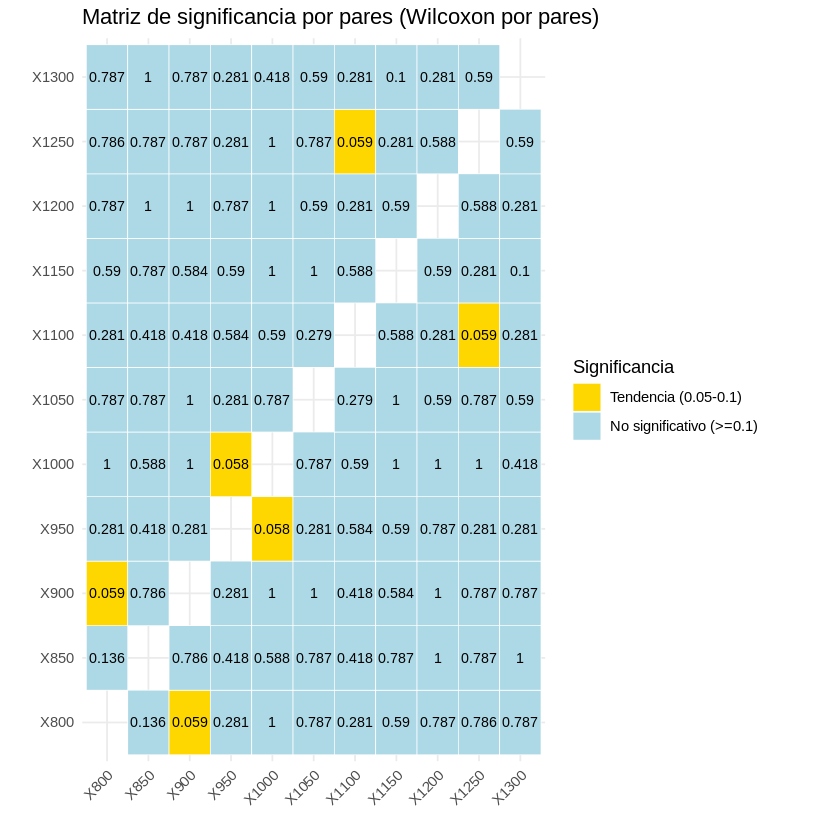

In [24]:
install.packages("reshape2")
library(reshape2)
library(ggplot2)

# Convertir la matriz en data frame largo, eliminando diagonales (NA)
df_long <- melt(matriz_final, na.rm = TRUE)
names(df_long) <- c("Grupo1", "Grupo2", "P_Valor")

# Crear una columna con categorías para colorear
df_long$Significancia <- cut(df_long$P_Valor,
  breaks = c(-Inf, 0.05, 0.1, Inf),
  labels = c("Significativo (<0.05)", "Tendencia (0.05-0.1)", "No significativo (>=0.1)")
)

# Generar el gráfico
ggplot(df_long, aes(x = Grupo1, y = Grupo2, fill = Significancia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(P_Valor, 3)), size = 3) +
  scale_fill_manual(values = c(
    "Significativo (<0.05)" = "red",
    "Tendencia (0.05-0.1)" = "gold",
    "No significativo (>=0.1)" = "lightblue"
  )) +
  labs(title = "Matriz de significancia por pares (Wilcoxon por pares)",
       x = "", y = "", fill = "Significancia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Comparación gráfica de las Ganancias obtenidas optimizando con los pares que tienen p-valor más cercano a 0.05, que son las únicas tendendias interesantes aunque no alcance el umbral de significancia estádística.

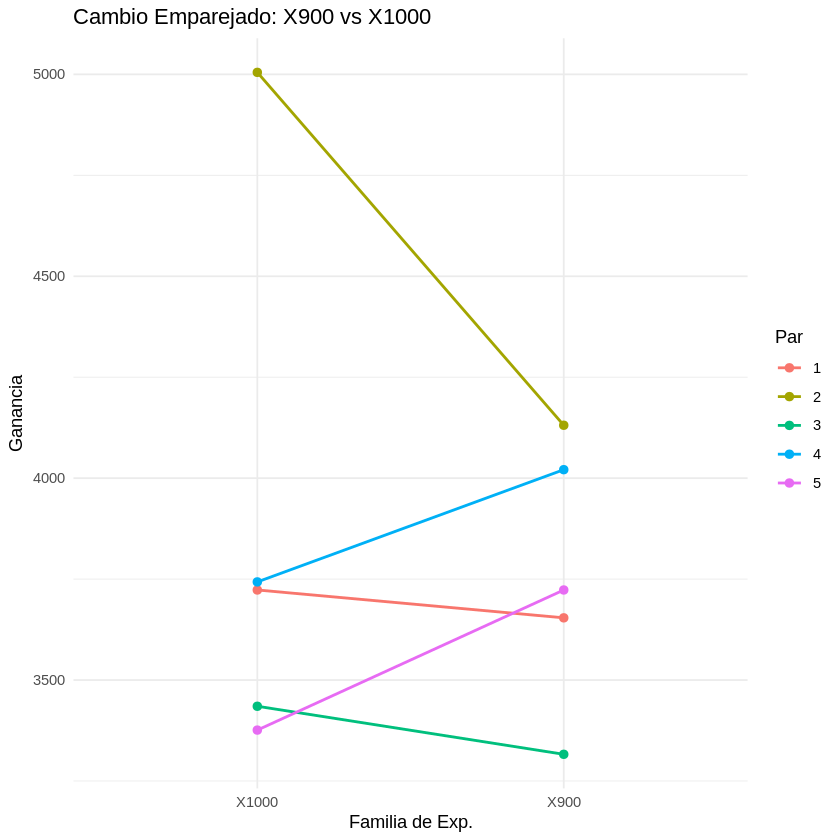

In [27]:
library(tidyr)
library(ggplot2)

# Comparar un par específico
df_pareado <- data.frame(
  ID = 1:5, # Corrected to 1:5 to match the length of X900 and X1000
  `X900` = todos_los_parametros$PARAM_X900,
  `X1000` = todos_los_parametros$PARAM_X1000
)

# Convertir a formato largo para graficar
df_largo <- pivot_longer(df_pareado, cols = c("X900", "X1000"), names_to = "Grupo", values_to = "Valor") # Corrected 'x1000' to 'X1000'

# Dotplot con líneas conectando los puntos emparejados
ggplot(df_largo, aes(x = Grupo, y = Valor, group = ID)) +
  geom_point(aes(color = as.factor(ID)), size = 2) +
  geom_line(aes(color = as.factor(ID)), linewidth = 0.8) +
  labs(title = "Cambio Emparejado: X900 vs X1000", # Updated title
       x = "Familia de Exp.", y = "Ganancia",
       color = "Par") +
  theme_minimal()

Este gráfico muestra la mediana, rango intercuartílico y posibles outliers de cada Familia de Hiperparametros Optimizados.

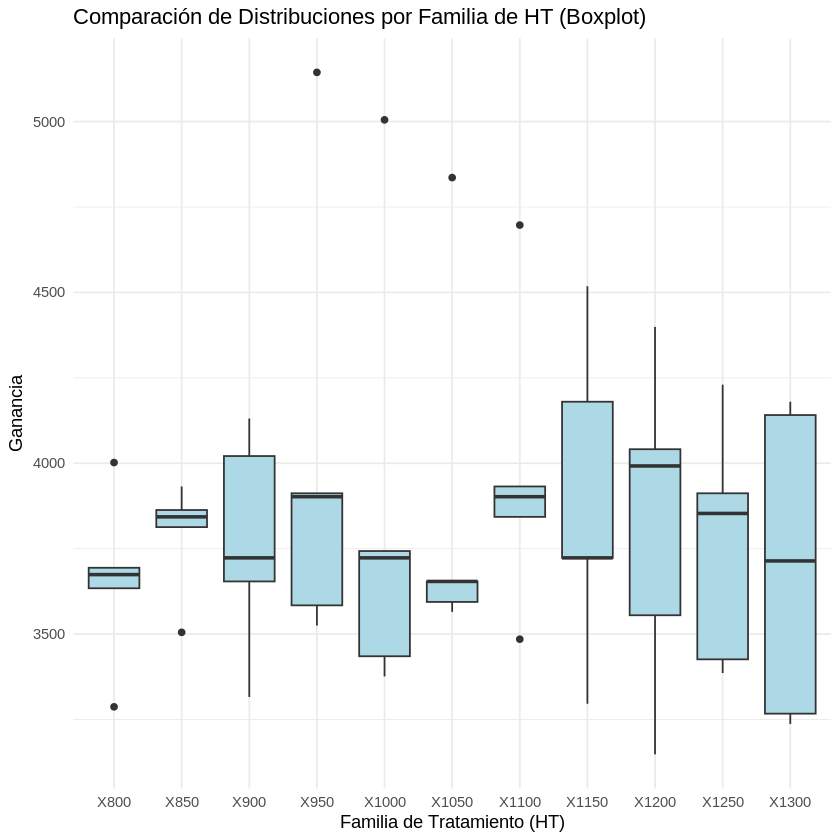

In [26]:
library(tidyr)
library(dplyr)

# Convertir la lista a un data frame largo (long format)
datos_largos <- todos_los_parametros %>%
  as.data.frame() %>%
  pivot_longer(cols = everything(), names_to = "Grupo", values_to = "Valor")

# Limpiar nombres de grupo (quitar "PARAM_")
datos_largos$Grupo <- gsub("PARAM_", "", datos_largos$Grupo)

# Ordenar por HT
datos_largos$Grupo <- factor(datos_largos$Grupo, levels = orden_grupos)

# Generar Boxplot
ggplot(datos_largos, aes(x = Grupo, y = Valor)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Comparación de Distribuciones por Familia de HT (Boxplot)",
       x = "Familia de Tratamiento (HT)",
       y = "Ganancia") +
  theme_minimal()
